In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

In [2]:
telco_base_data = pd.read_csv('C:/Users/jyoth/Documents/Telco_Customer_Churn/Telco-Customer-Churn.csv')

In [3]:
telco_base_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
telco_base_data.shape

(7043, 21)

In [5]:
telco_base_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [72]:
telco_base_data.PaymentMethod.value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [6]:
telco_base_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
telco_base_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


1. SeniorCitizen is categorical, hence 25-50-75% are not properly distributed.
2. 75% of customers have a tenure of less than 55 months.
3. Average monthly charges are around USD 65 whereas 25% of customers pay more than USD 90 per month.

In [8]:
telco_base_data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [9]:
(telco_base_data['Churn'].value_counts()/telco_base_data.shape[0])*100

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

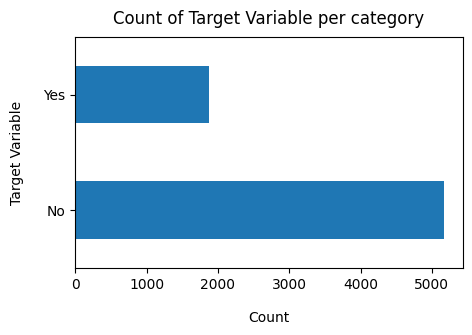

In [10]:
telco_base_data['Churn'].value_counts().plot(kind = 'barh', figsize=(5,3))
plt.xlabel("Count",labelpad = 14)
plt.ylabel("Target Variable", labelpad = 14)
plt.title("Count of Target Variable per category",y = 1.02)
plt.show()

1. Data is Highly Imbalanced with ratio 73:23
2. So we analyse the data with other features while taking the target values separately to get some insights.

In [11]:
# Concise summary of dataframe, since we have too many columns we use verbose = True
telco_base_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
(telco_base_data.isnull().sum()/telco_base_data.shape[0])*100

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

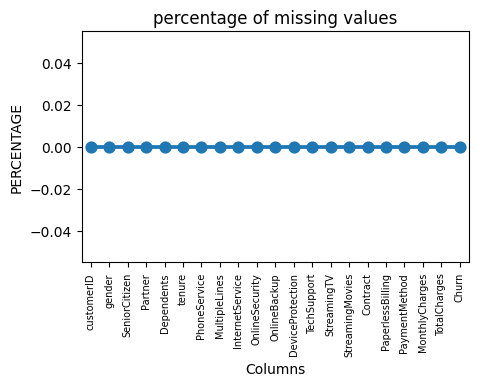

In [13]:
missing = pd.DataFrame((telco_base_data.isnull().sum()/telco_base_data.shape[0])*100).reset_index()
plt.figure(figsize=(5,3))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation = 90,fontsize = 7)
plt.title("percentage of missing values")
plt.xlabel("Columns")
plt.ylabel("PERCENTAGE")
plt.show()

Here, We don't have any missing values in the data

## Data Cleaning

In [14]:
telco_data = telco_base_data.copy()

In [15]:
telco_data.drop(['customerID'],axis = 1,inplace = True)

In [16]:
#Converting TotalCharges to numeric
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges,errors = 'coerce')
telco_data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [17]:
telco_data.loc[telco_data['TotalCharges'].isnull() == True]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [18]:
(telco_data.TotalCharges.isnull().sum()/len(telco_data))*100

0.1561834445548772

Since the % of missing values in that column are really low we can drop the missing values.

In [19]:
telco_data.dropna(how = 'any', inplace = True)

In [20]:
# Dividing the tenure into bins 
print(telco_data['tenure'].max())

72


In [21]:
# Grouping into bins of 12 months each
labels = ["{0} - {1}".format(i,i+11) for i in range(1,72,12)]

telco_data['tenure_group'] = pd.cut(telco_data.tenure, range(1,80,12), right = False, labels=labels)

In [22]:
telco_data['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

In [23]:
telco_data.drop('tenure',axis = 1,inplace = True)

In [24]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


## Data Exploration

### Univariate Analysis -(plot distribution of individual predictors by target variable(Churn))

In [25]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   object  
 1   SeniorCitizen     7032 non-null   int64   
 2   Partner           7032 non-null   object  
 3   Dependents        7032 non-null   object  
 4   PhoneService      7032 non-null   object  
 5   MultipleLines     7032 non-null   object  
 6   InternetService   7032 non-null   object  
 7   OnlineSecurity    7032 non-null   object  
 8   OnlineBackup      7032 non-null   object  
 9   DeviceProtection  7032 non-null   object  
 10  TechSupport       7032 non-null   object  
 11  StreamingTV       7032 non-null   object  
 12  StreamingMovies   7032 non-null   object  
 13  Contract          7032 non-null   object  
 14  PaperlessBilling  7032 non-null   object  
 15  PaymentMethod     7032 non-null   object  
 16  MonthlyCharges    7032 non-nu

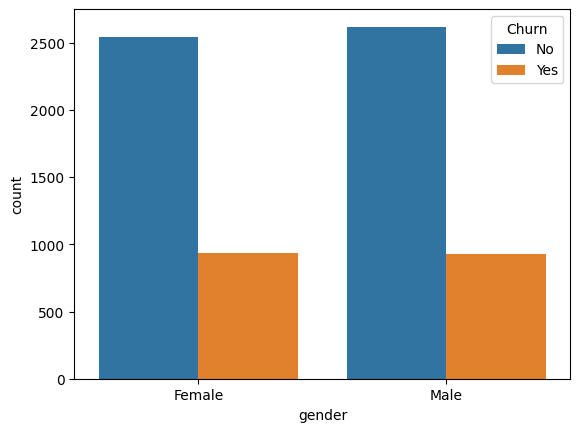

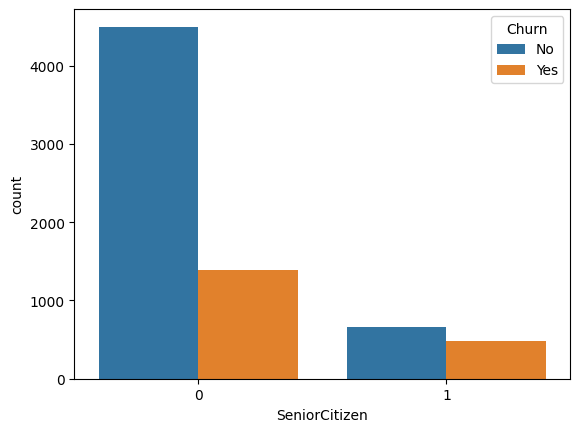

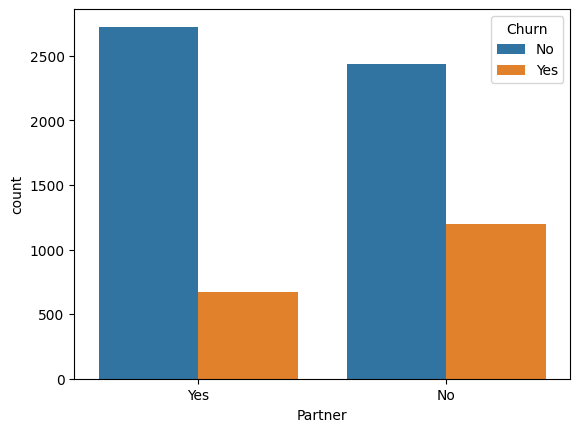

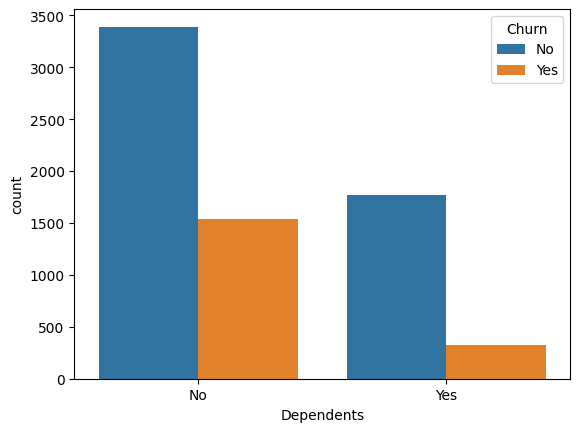

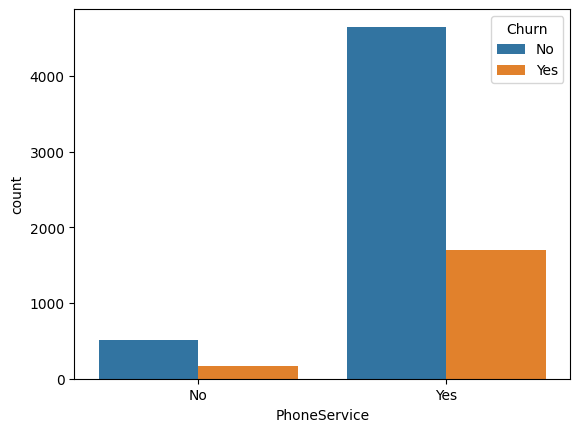

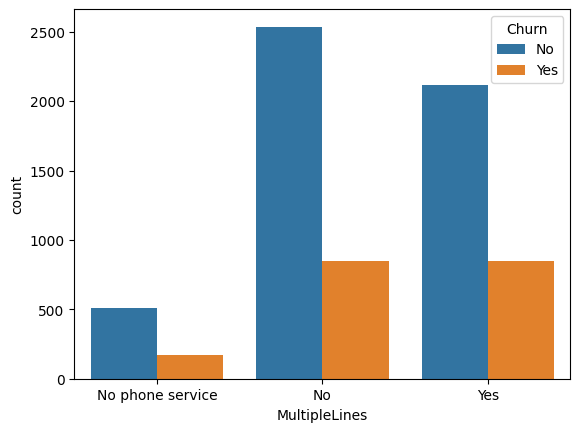

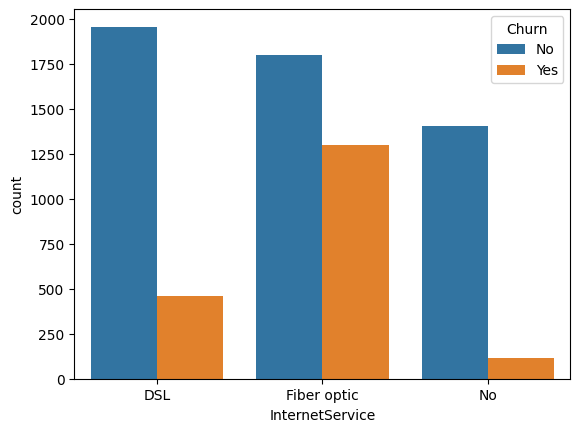

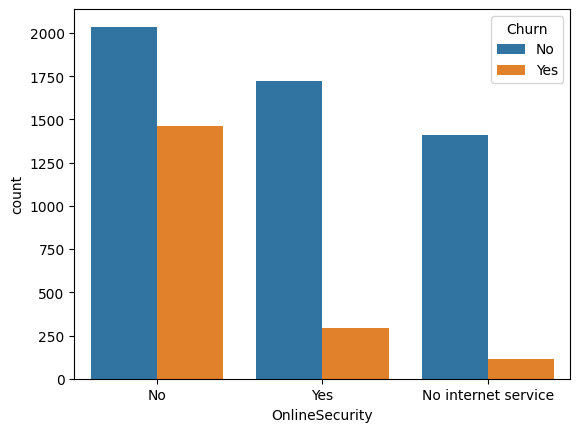

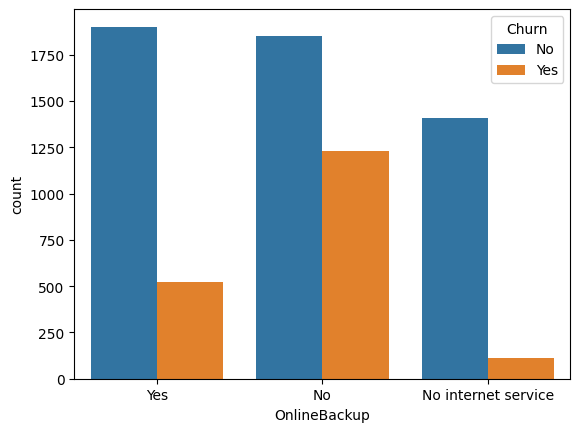

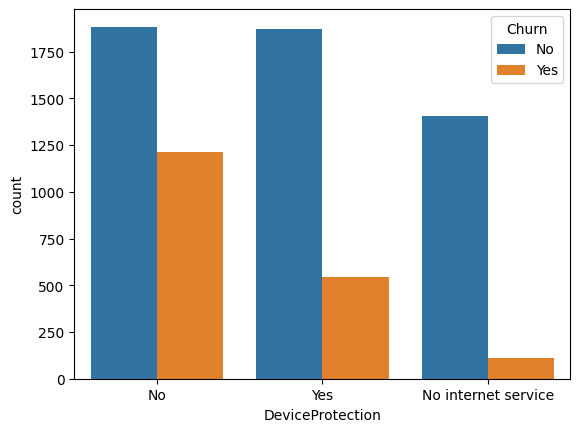

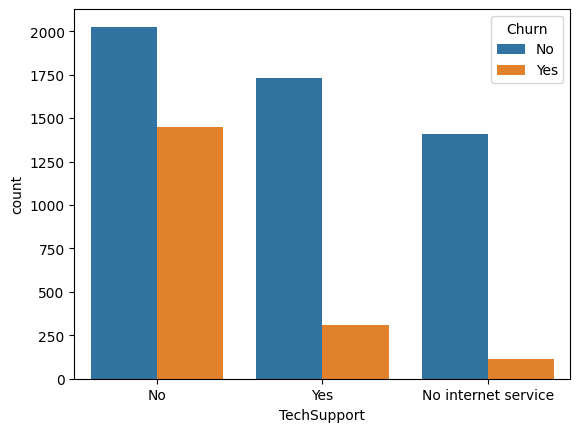

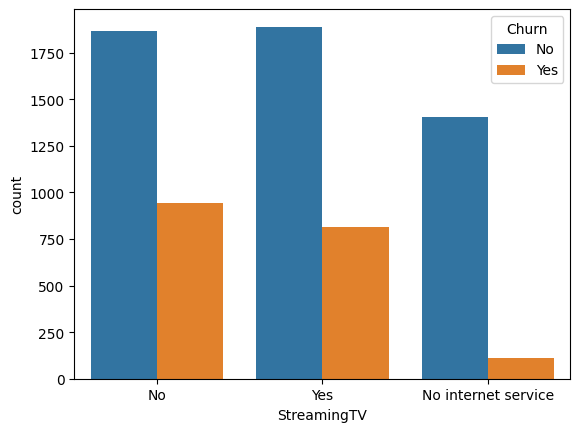

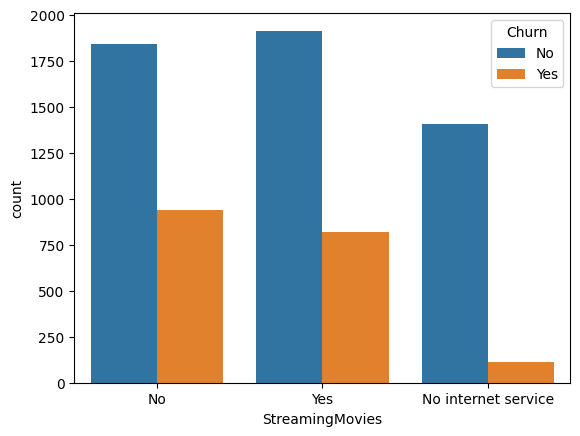

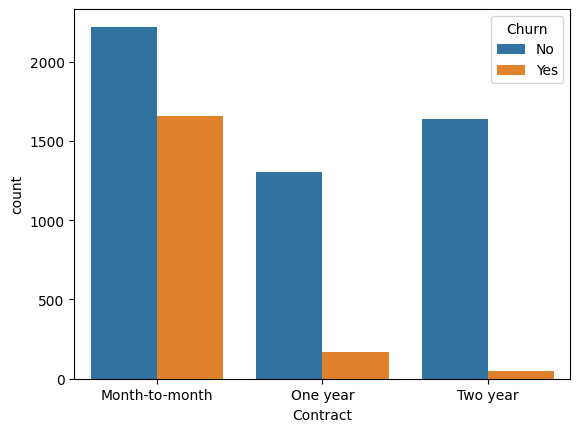

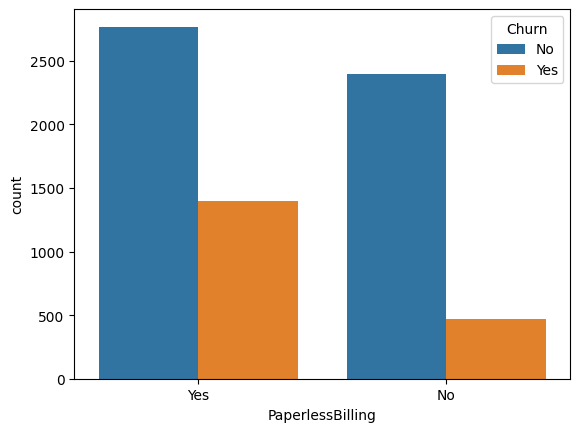

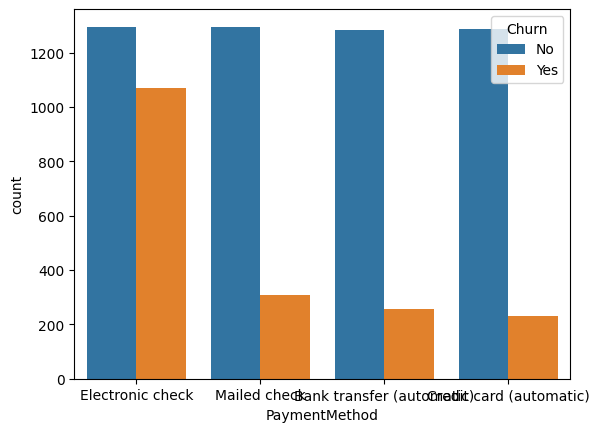

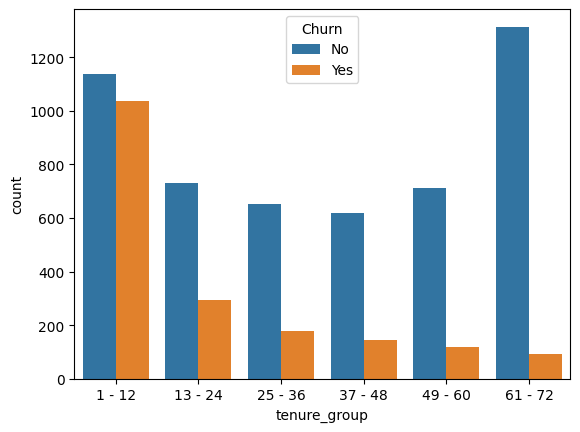

In [26]:
for i, predictor in enumerate(telco_data.drop(columns = ['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_data, x=predictor, hue='Churn')
    plt.show()

In [27]:
# Converting the target variable 'Churn' into a binary numeric variable where yes=1 and no=0
telco_data['Churn'] = np.where(telco_data.Churn == 'Yes',1,0)

In [28]:
telco_data_cleaned = telco_data.copy()

In [29]:
telco_data_cleaned['gender'] = telco_data_cleaned['gender'].apply(lambda x: x.lower()).map({'male':1,'female':0})
telco_data_cleaned['Partner'] = telco_data_cleaned['Partner'].apply(lambda x: x.lower()).map({'yes':1,'no':0})
telco_data_cleaned['Dependents'] = telco_data_cleaned['Dependents'].apply(lambda x: x.lower()).map({'yes':1,'no':0})
telco_data_cleaned['PhoneService'] = telco_data_cleaned['PhoneService'].apply(lambda x: x.lower()).map({ 'yes':1,'no':0})

In [30]:
telco_data_cleaned['MultipleLines'] = np.where(telco_data_cleaned.MultipleLines == 'Yes',1,0)
telco_data_cleaned['OnlineSecurity'] = np.where(telco_data_cleaned.OnlineSecurity == 'Yes',1,0)
telco_data_cleaned['OnlineBackup'] = np.where(telco_data_cleaned.OnlineBackup == 'Yes',1,0)
telco_data_cleaned['DeviceProtection'] = np.where(telco_data_cleaned.DeviceProtection == 'Yes',1,0)
telco_data_cleaned['TechSupport'] = np.where(telco_data_cleaned.TechSupport == 'Yes',1,0)
telco_data_cleaned['StreamingTV'] = np.where(telco_data_cleaned.StreamingTV == 'Yes',1,0)
telco_data_cleaned['StreamingMovies'] = np.where(telco_data_cleaned.StreamingMovies == 'Yes',1,0)
telco_data_cleaned['PaperlessBilling'] = np.where(telco_data_cleaned.PaperlessBilling == 'Yes',1,0)

In [31]:
telco_data_cleaned

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,0,0,1,0,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1 - 12
1,1,0,0,0,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0,25 - 36
2,1,0,0,0,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1 - 12
3,1,0,0,0,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,0,0,0,0,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1 - 12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0,13 - 24
7039,0,0,1,1,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0,61 - 72
7040,0,0,1,1,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0,1 - 12
7041,1,1,1,0,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1,1 - 12


In [32]:
telco_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   int64   
 1   SeniorCitizen     7032 non-null   int64   
 2   Partner           7032 non-null   int64   
 3   Dependents        7032 non-null   int64   
 4   PhoneService      7032 non-null   int64   
 5   MultipleLines     7032 non-null   int32   
 6   InternetService   7032 non-null   object  
 7   OnlineSecurity    7032 non-null   int32   
 8   OnlineBackup      7032 non-null   int32   
 9   DeviceProtection  7032 non-null   int32   
 10  TechSupport       7032 non-null   int32   
 11  StreamingTV       7032 non-null   int32   
 12  StreamingMovies   7032 non-null   int32   
 13  Contract          7032 non-null   object  
 14  PaperlessBilling  7032 non-null   int32   
 15  PaymentMethod     7032 non-null   object  
 16  MonthlyCharges    7032 non-nu

In [33]:
telco_data_cleaned.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
tenure_group        0
dtype: int64

In [34]:
telco_data_dummies = pd.get_dummies(telco_data_cleaned, dtype=int)
telco_data_dummies.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
1,1,0,0,0,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,1,0,0,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,1,1,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


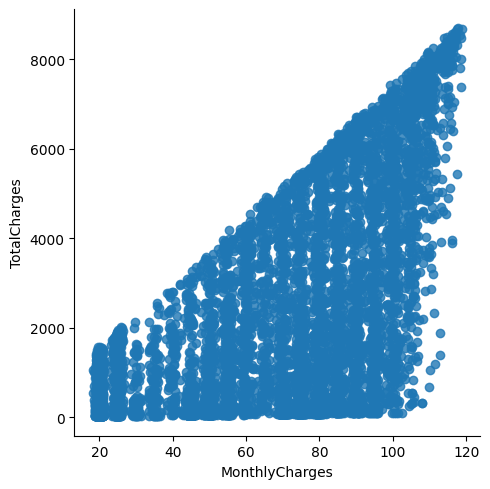

In [35]:
# Checking relationship between MonthlyCharges and TotalCharges
sns.lmplot(data=telco_data_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

TotalCharges increases as MonthlyCharges increase.

Text(0.5, 1.0, 'Monthly Charges by churn')

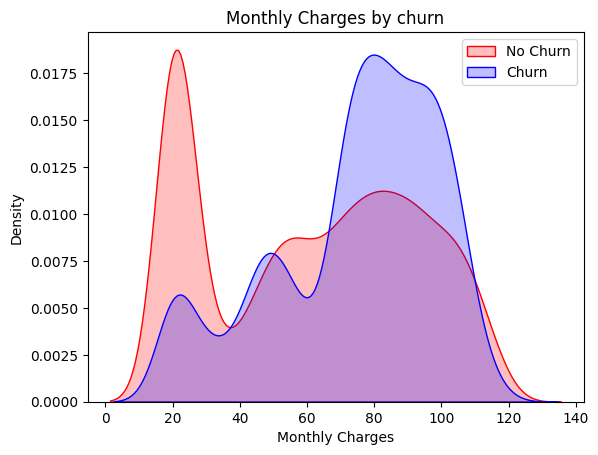

In [36]:
# plotting churn by monthlyCharges
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 0)], color="Red", fill = True)
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 1)], ax=Mth, color="Blue", fill = True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly Charges by churn')

Churn is High when Monthly Charges are High.

Text(0.5, 1.0, 'Total Charges by churn')

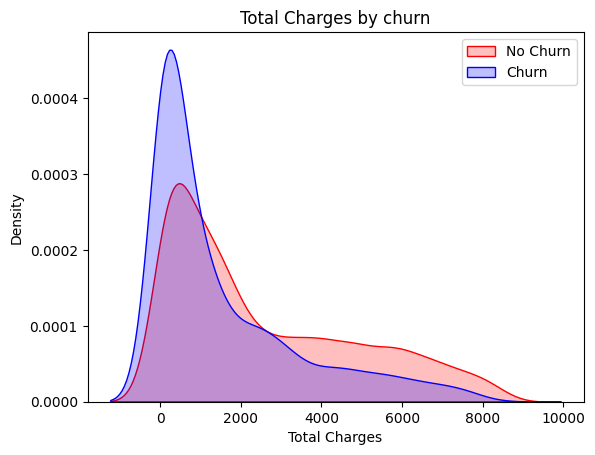

In [37]:
# plotting churn by TotalCharges
tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 0)], color="Red", fill = True)
tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 1)], ax=tot, color="Blue", fill = True)
tot.legend(["No Churn","Churn"],loc='upper right')
tot.set_ylabel('Density')
tot.set_xlabel('Total Charges')
tot.set_title('Total Charges by churn')

Surprisingly, High churn rate is at lower total Charges.

However, if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges and Total Charges it depicts that High MonthlyCharges at Low Tenure Results in Lower TotalCharge.Hence, all the 3 factors **Higher MontlyCharge, Lower Tenure and Lower TotalCharge** are linked to **High Churn**.

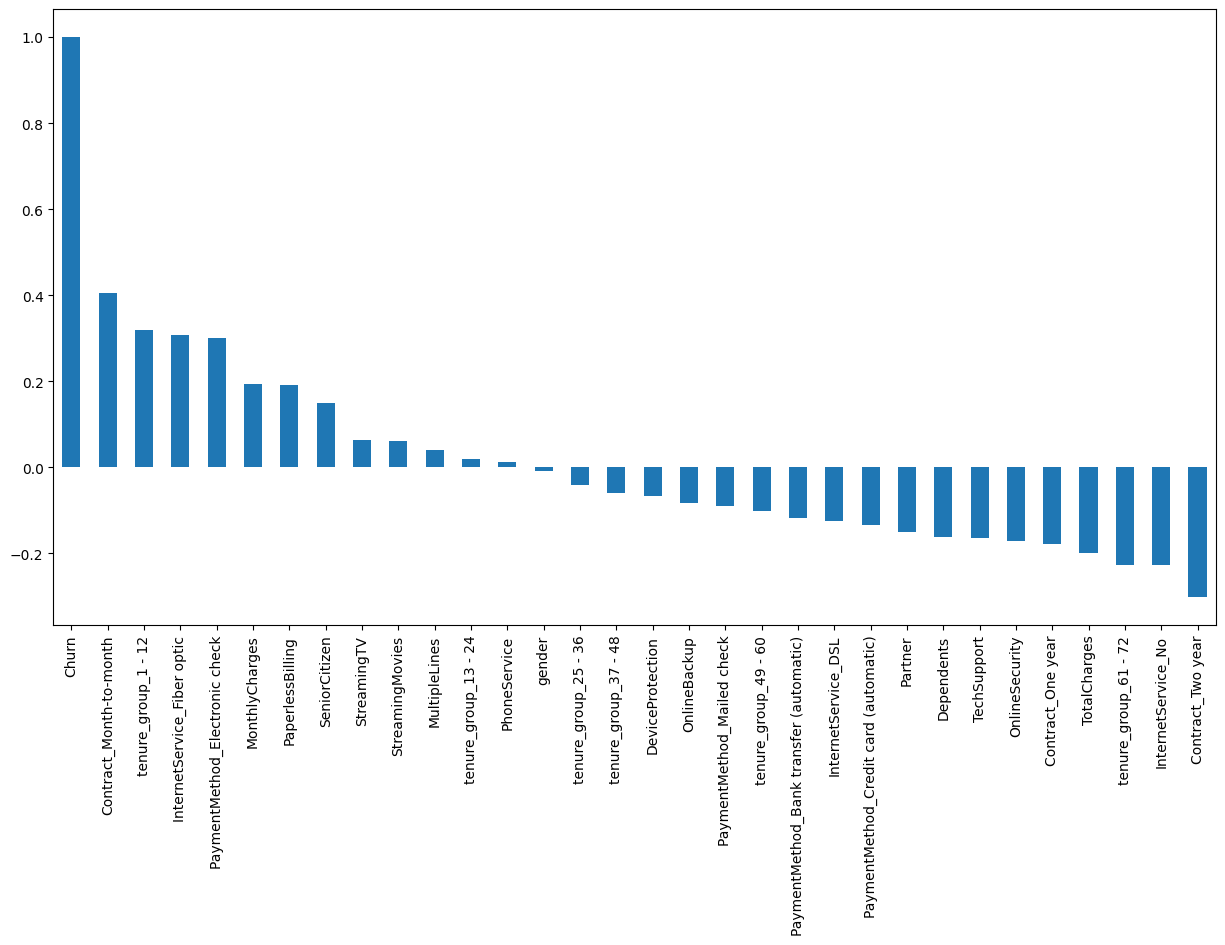

In [38]:
# Correlation of all predictors with Churn
plt.figure(figsize=(15,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.show()

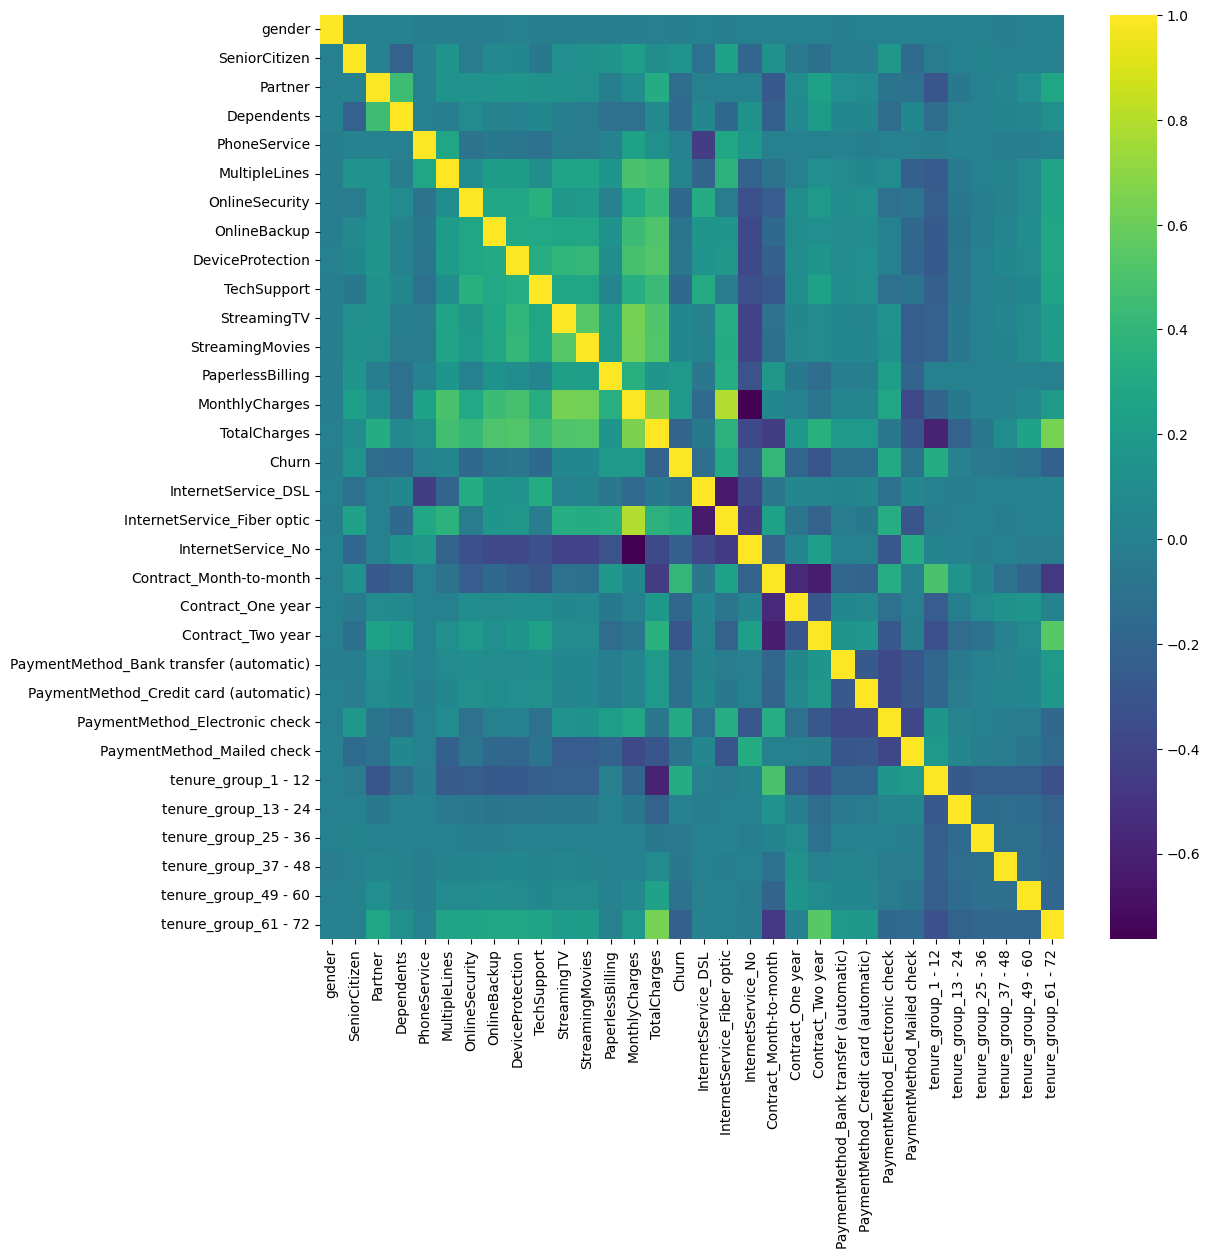

In [39]:
# heatmap of all predictor
plt.figure(figsize=(12,12))
sns.heatmap(telco_data_dummies.corr(),cmap="viridis")
plt.show()

### Bivariate Analysis

In [54]:
df_churner = telco_data.loc[telco_data["Churn"]==1]
df_non_churner = telco_data.loc[telco_data["Churn"]==0]

In [65]:
def uniplot(df,col,title,hue=None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams["axes.titlesize"] = 22
    plt.rcParams["axes.titlepad"] = 30

    temp = pd.Series(data=hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width, 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index, hue = hue, palette='bright')

    plt.show() 

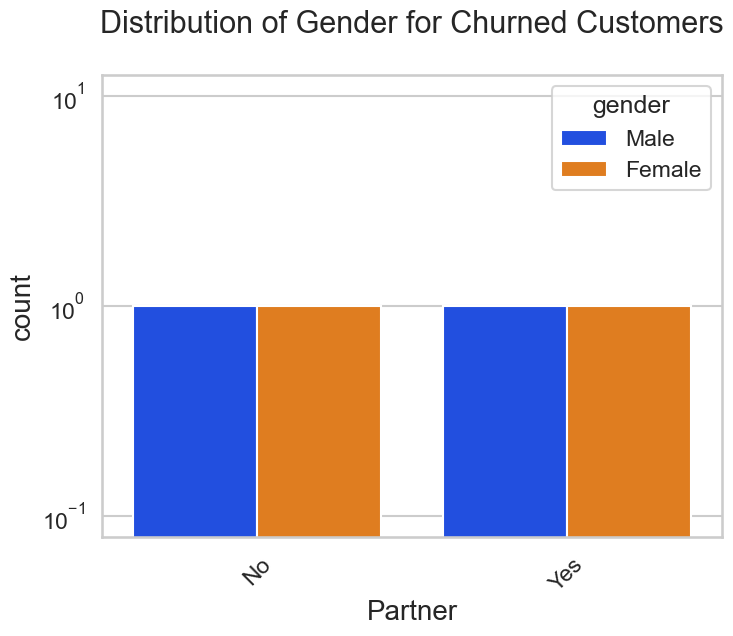

In [66]:
uniplot(df_churner,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

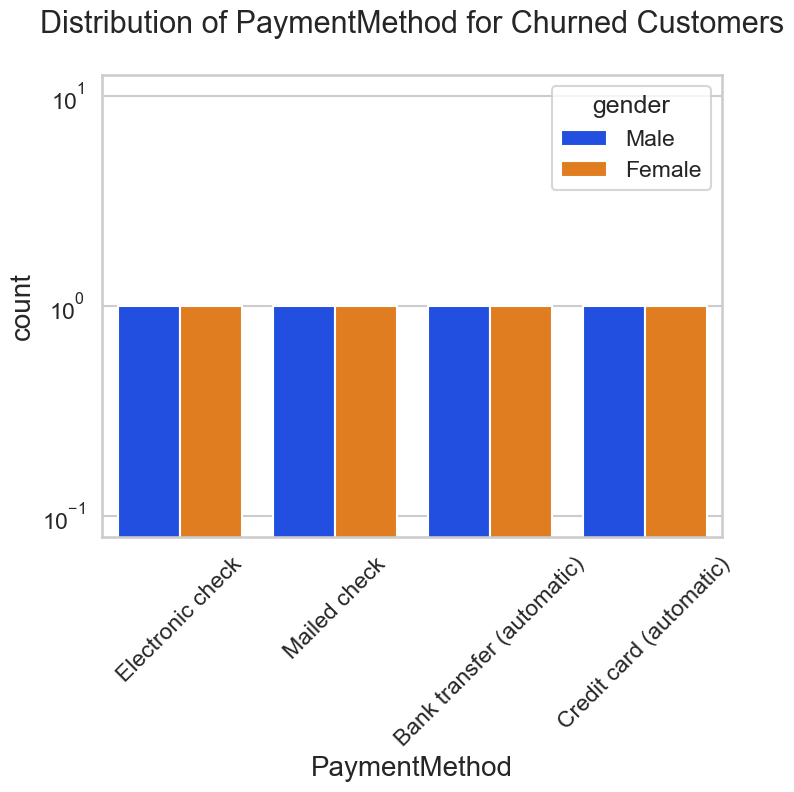

In [67]:
uniplot(df_churner,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

In [69]:
telco_data_dummies.to_csv('Telco_data_cleaned.csv')